In [2]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset, using different encoding due to non printable ascii characters

df = pd.read_csv('./datasets/spotify-2023.csv', encoding="latin")

# Test if dataset is loaded
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Exploring the Data

1. Display information about dataset

In [4]:
# Display info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

- From this, we can tell that there are null values, which we will later remove

In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Cleaning the dataset

1. The dataset contains some empty values. We will drop all rows that contain any empty values. 

In [6]:
# Drops values that are empty

df.dropna(axis=0, how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    object
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    object
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


2. Some integers contain ",". We will remove all "," within the dataset so the strings can be converted to integers properly.

In [7]:
target_columns = ["in_deezer_playlists", "in_shazam_charts"]

print(df["in_shazam_charts"].iloc[12])

for column in target_columns:
    df[column] = df[column].apply(lambda x: x.replace(",", ""))

print(df["in_shazam_charts"].iloc[12])

1,281
1281


3. We choose to sum up chart appearances and playlists appearances into their individual columns

In [8]:
def combine_columns(data: pd.DataFrame, result: str, targets: list):
    data[result] = data[targets].astype(int).sum(axis=1)
    for target in targets:
        data.drop(target, axis=1, inplace=True)

combine_columns(df, "in_charts", ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'])
combine_columns(df, "in_playlists", ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,826,125,B,Major,80,89,83,31,0,8,4,420,641
1,LALA,Myke Towers,1,2023,3,23,133716286,382,92,C#,Major,71,61,74,7,0,10,4,188,1580
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,949,138,F,Major,51,32,53,17,0,31,6,334,1582
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,548,170,A,Major,55,58,72,11,0,11,15,319,8099
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,425,144,A,Minor,65,23,80,14,63,11,6,198,3304


# Data Visualisation

1. Plotting Correlation Matrix. This tells us which vairables are correlated to each other so we can further plot other graphs.

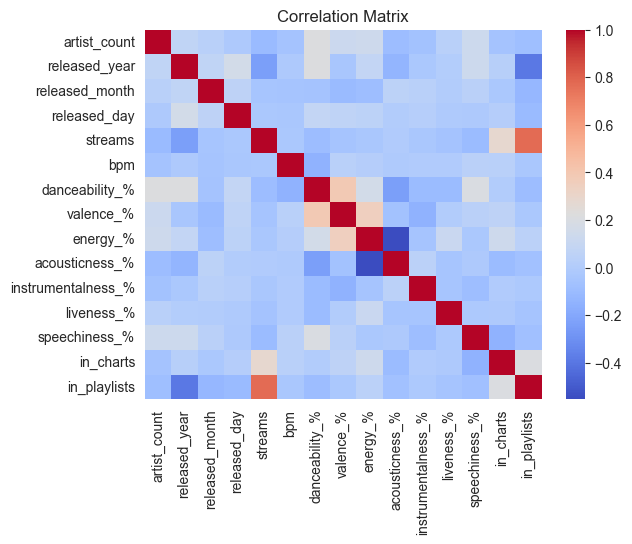

In [9]:
# Plot a correlation matrix

cmatrix = df.corr(numeric_only=True)

sns.heatmap(cmatrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

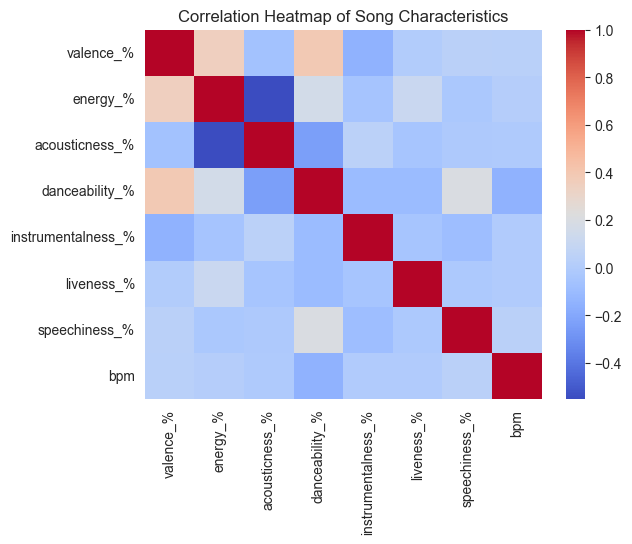

In [10]:
# Plot a correlation matrix of song characteristics
features = df[['valence_%', 'energy_%', 'acousticness_%', 'danceability_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

cmatrix = features.corr()

sns.heatmap(cmatrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Song Characteristics')
plt.show()


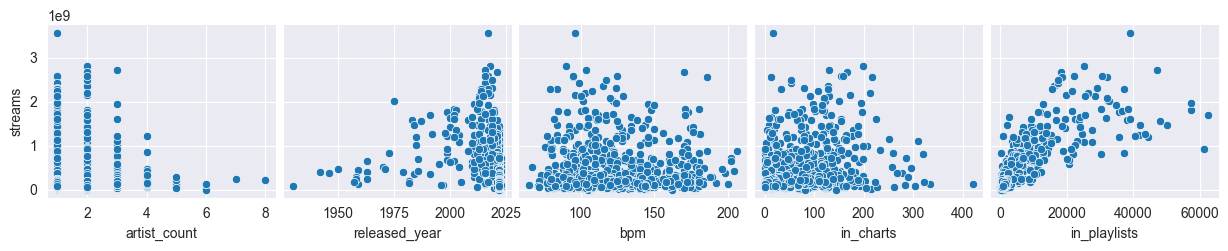

In [11]:
columns = ['artist_count', 'released_year', 'bpm', 'in_charts', 'in_playlists']

sns.pairplot(df, x_vars = columns, y_vars = ['streams'])

2. Plotting Scatter Plots. This allows us to observe trends between two variables

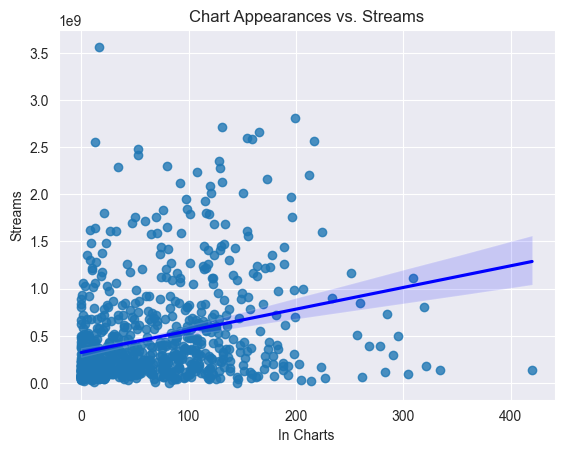

In [12]:
# Plot scatterplot of streams against chart appearances, as well as a best fit line to represent the trend

sns.regplot(data=df, x='in_charts', y='streams', line_kws={'color': 'blue'})
plt.xlabel('In Charts')
plt.ylabel('Streams')
plt.title('Chart Appearances vs. Streams')
plt.show()

This proves that number of **streams** is directly proportional to **chart appearances**

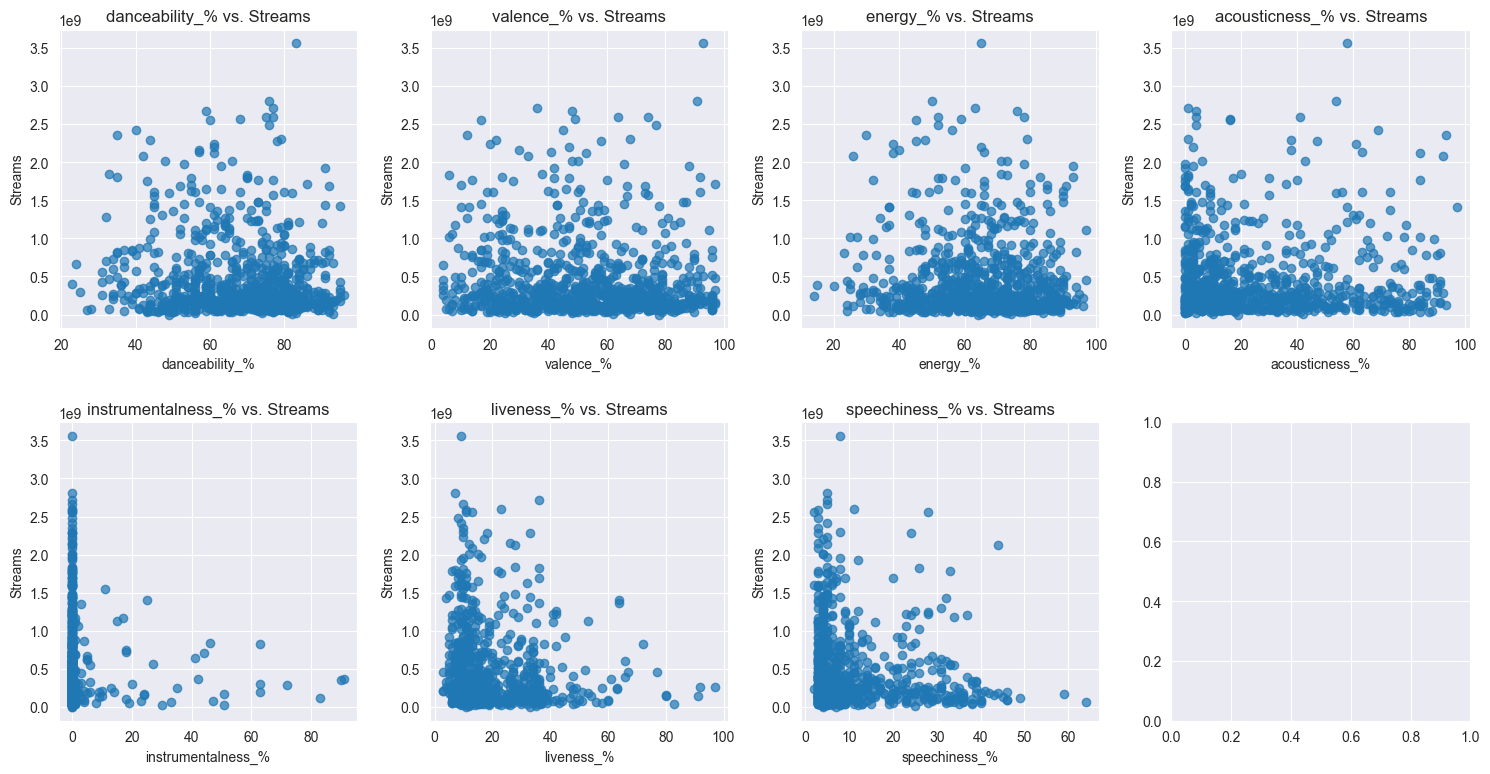

In [13]:
# Plot % against streams

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['streams'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('Streams')
   axes[col, row].set_title(f'{feature} vs. Streams')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

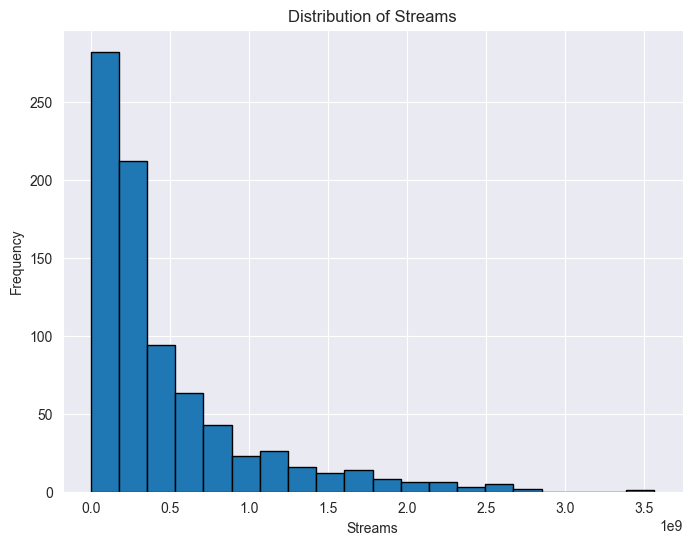

In [14]:
# Plot histogram for distribution of streams

plt.figure(figsize=(8, 6))
plt.hist(df['streams'], bins=20, edgecolor='black')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams')
plt.grid(True)
plt.show()

# Modelling

We will create a regression model as we are predicting continuous data.

We will be evaluating on 3 different values:
- "in_charts"
- "in_playlists"
- "streams"

In [15]:
x = df.drop("in_charts", axis=1).drop("in_playlists", axis=1).drop("streams", axis=1)
y1 = df["in_charts"]
y2 = df["in_playlists"]
y3 = df["streams"]

x.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,425,144,A,Minor,65,23,80,14,63,11,6


We will convert:

- "key"
- "mode"

to dummy variables.

In [16]:
def convert_to_dummy(data: pd.DataFrame, target: str):
    dummies = pd.get_dummies(data[target], dtype=int)
    data.drop(target, inplace=True, axis=1)
    return pd.concat([data, dummies], axis=1)

x = convert_to_dummy(x, "key")
x = convert_to_dummy(x, "mode")
x.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_shazam_charts,bpm,danceability_%,valence_%,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,826,125,80,89,...,0,0,0,0,0,0,0,0,1,0
1,LALA,Myke Towers,1,2023,3,23,382,92,71,61,...,1,0,0,0,0,0,0,0,1,0
2,vampire,Olivia Rodrigo,1,2023,6,30,949,138,51,32,...,0,0,0,0,1,0,0,0,1,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,548,170,55,58,...,0,0,0,0,0,0,0,0,1,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,425,144,65,23,...,0,0,0,0,0,0,0,0,0,1


We will drop:
- "track_name"
- "released_month"
- "released_day"
- "artist(s)_name"
    - TODO: Prehaps we could try encoding this?

In [17]:
to_drop = ["track_name", "released_month", "released_day", "artist(s)_name"]

for targets in to_drop:
    x.drop(targets, inplace=True, axis=1)
x.head()

,artist_count,released_year,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,2,2023,826,125,80,89,83,31,0,8,...,0,0,0,0,0,0,0,0,1,0
1,1,2023,382,92,71,61,74,7,0,10,...,1,0,0,0,0,0,0,0,1,0
2,1,2023,949,138,51,32,53,17,0,31,...,0,0,0,0,1,0,0,0,1,0
3,1,2019,548,170,55,58,72,11,0,11,...,0,0,0,0,0,0,0,0,1,0
4,1,2023,425,144,65,23,80,14,63,11,...,0,0,0,0,0,0,0,0,0,1


Split data up into training and testing data.

In [18]:
from sklearn.model_selection import train_test_split

x1_train, x1_val, y1_train, y1_val = train_test_split(x, y1, test_size=0.3, random_state=42)
x2_train, x2_val, y2_train, y2_val = train_test_split(x, y2, test_size=0.3, random_state=42)
x3_train, x3_val, y3_train, y3_val = train_test_split(x, y3, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)

lr1_score = lr1.score(x1_val, y1_val)
print("Accuracy 1: ", lr1_score)

lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)

lr2_score = lr2.score(x2_val, y2_val)
print("Accuracy 2: ", lr2_score)

lr3 = LinearRegression()
lr3.fit(x3_train, y3_train)

lr3_score = lr3.score(x3_val, y3_val)
print("Accuracy 3: ", lr3_score)

Accuracy 1:  0.14780184518555128
Accuracy 2:  0.1310938112298209
Accuracy 3:  0.08157661329173693
